### Plot _thornado_ data

Notebook for quick plotting of 1D _thornado_ data. 

---

To Do:  

* Make it easier to select what to plot. Currently: Very Manual 
* Want easier use for data from multiple runs

In [1]:
import h5py    
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib ipympl

In [2]:
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['legend.handlelength']=4
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['ytick.minor.visible']=True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.labelsize']   = 14
mpl.rcParams['ytick.labelsize']   = 14

Data Directory. Simply change `simName` to the desired simulation. Later will likely have to modify.

In [3]:
sims = ["100_B1.0_C0.0_3"]
fields = [ 'uAF_P', 'uAF_Ye', 'uPF_V1', 'uCF_D', 'uCF_Ne' ]
simName = "Sod"
simType = "nuclear" #Currently: "ideal" or "nuclear"
sim_cw = "cw_100_B1.0_C0.0_3" #The desired run
sim  = "paramStudy/100_B1.0_C0.0_3"
sim_ref = "reference" #Analytic, for comparison

dataDir = "../../data/" + simName + "/" + simType + "/" + sim
dataDir_cw = "../../data/" + simName + "/" + simType + "/" + sim_cw 
dataDir_ref = "../../data/" + simName + "/" + simType + "/" + sim_ref

Setup figure directory

In [4]:
figDir = "../figures/"

For now, manually specify the `fileNumber`. Possibly add in ways to automatically get the max.

In [5]:
fileNumber = "000102"
#fileName = dataDir + '/' + simName + '_FluidFields_' + fileNumber + '.h5' 
fileName = dataDir + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' 
fileName_cw  = dataDir_cw + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5'
fileName_ref = dataDir_ref + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5'

mb = 1.660539 * pow(10,-24)

Read the Data

In [49]:
with h5py.File(fileName, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1 = f['/Spatial Grid/X1'][:]
    
    uAF_P  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]
    
    uPF_V1 = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")
    
### With componentwise limiting    
with h5py.File(fileName_cw, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1_cw = f['/Spatial Grid/X1'][:]
    
    uAF_P_cw  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_T_cw = f['/Fluid Fields/Auxiliary/Temperature'][:]
    uAF_Ye_cw = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]
    
    uPF_V1_cw  = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D_cw  = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_cw  = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")    
    

 ### The 'analytic' run   
with h5py.File(fileName_ref, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1_ref = f['/Spatial Grid/X1'][:]

    uAF_P_ref  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye_ref = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]
    
    uPF_V1_ref = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    
    uCF_D_ref = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_ref = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")   
           

Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.025 ms
Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.025 ms
Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.025 ms


Read the desired fields into a python dictionary.

In [50]:
data = {}

data[sims[i]] = {}
data[sims[i]]['x1'] = x1[:]
data[sims[i]][fields[0]] = uAF_P[0][0][:]
data[sims[i]][fields[1]] = mb * uCF_Ne[0][0][:] / uCF_D[0][0][:]#uAF_Ye[0][0][:]
data[sims[i]][fields[2]] = uPF_V1[0][0][:]
data[sims[i]][fields[3]] = uCF_D[0][0][:]
data[sims[i]][fields[4]] = uCF_Ne[0][0][:]

data_cw = {}

data_cw[sims[i]] = {}
data_cw[sims[i]]['x1'] = x1[:]
data_cw[sims[i]][fields[0]] = uAF_P_cw[0][0][:]
data_cw[sims[i]][fields[1]] = mb * uCF_Ne_cw[0][0][:] / uCF_D_cw[0][0][:]#uAF_Ye[0][0][:]
data_cw[sims[i]][fields[2]] = uPF_V1_cw[0][0][:]
data_cw[sims[i]][fields[3]] = uCF_D_cw[0][0][:]
data_cw[sims[i]][fields[4]] = uCF_Ne_cw[0][0][:]

data_ref = {}

data_ref['uCF_D'] = uCF_D_ref[0][0][:]
data_ref['uAF_Ye'] = mb * uCF_Ne_ref[0][0][:] / uCF_D_an[0][0][:]
data_ref['uCF_Ne'] = uCF_Ne_ref[0][0][:]
data_ref['uAF_P'] = uAF_P_ref[0][0][:]
data_ref['uPF_V1'] = uPF_V1_ref[0][0][:]



Compute Cell Averages

In [51]:
nNodes = 3
wG = [ 5.0/(1*18.0), 8.0/(1*18.0), 5.0/(1*18.0) ]
N_N = len(x1)

N_K = N_N / nNodes

#Make this nicer by creating a summation over len(fields)
data_avg = {}
for i in range( len( sims ) ):
    data_avg[sims[i]] = {}
    data_avg[sims[i]]['x1'] = np.zeros(int(N_K)) #Create arrays of length N_K
    data_avg[sims[i]][fields[0]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[1]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[2]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[3]] = np.zeros(int(N_K))
    data_avg[sims[i]][fields[4]] = np.zeros(int(N_K))
    for j in range(int(N_K)):
        data_avg[sims[i]]['x1'][j] = (np.sum( wG * data[sims[i]]['x1'][(j)*nNodes:(j+1)*nNodes] ))
        data_avg[sims[i]][fields[0]][j] = np.sum( wG * data[sims[i]][fields[0]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[1]][j] = np.sum( wG * data[sims[i]][fields[1]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[2]][j] = np.sum( wG * data[sims[i]][fields[2]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[3]][j] = np.sum( wG * data[sims[i]][fields[3]][(j)*nNodes:(j+1)*nNodes] )
        data_avg[sims[i]][fields[4]][j] = np.sum( wG * data[sims[i]][fields[4]][(j)*nNodes:(j+1)*nNodes] )
        
data_avg_cw = {}
for i in range( len( sims ) ):
    data_avg_cw[sims[i]] = {}
    data_avg_cw[sims[i]]['x1'] = np.zeros(int(N_K)) #Create arrays of length N_K
    data_avg_cw[sims[i]][fields[0]] = np.zeros(int(N_K))
    data_avg_cw[sims[i]][fields[1]] = np.zeros(int(N_K))
    data_avg_cw[sims[i]][fields[2]] = np.zeros(int(N_K))
    data_avg_cw[sims[i]][fields[3]] = np.zeros(int(N_K))
    data_avg_cw[sims[i]][fields[4]] = np.zeros(int(N_K))
    for j in range(int(N_K)):
        data_avg_cw[sims[i]]['x1'][j] = (np.sum( wG * data[sims[i]]['x1'][(j)*nNodes:(j+1)*nNodes] ))
        data_avg_cw[sims[i]][fields[0]][j] = np.sum( wG * data_cw[sims[i]][fields[0]][(j)*nNodes:(j+1)*nNodes] )
        data_avg_cw[sims[i]][fields[1]][j] = np.sum( wG * data_cw[sims[i]][fields[1]][(j)*nNodes:(j+1)*nNodes] )
        data_avg_cw[sims[i]][fields[2]][j] = np.sum( wG * data_cw[sims[i]][fields[2]][(j)*nNodes:(j+1)*nNodes] )
        data_avg_cw[sims[i]][fields[3]][j] = np.sum( wG * data_cw[sims[i]][fields[3]][(j)*nNodes:(j+1)*nNodes] )
        data_avg_cw[sims[i]][fields[4]][j] = np.sum( wG * data_cw[sims[i]][fields[4]][(j)*nNodes:(j+1)*nNodes] )        

Plot! Compare to 'Analytic'

In [52]:
fig, cax = plt.subplots(1, sharex=True,figsize=(7,7))

cax.plot(data_avg[sims[0]]['x1'],data_avg[sims[0]]['uCF_D'], marker='.',label="Characteristic Limiting", color = "blue")
#cax.plot(x1_lowD,100*data_lowD['uCF_D'], linestyle='-',marker='.',markersize=2,linewidth=0.75, label="Characteristic Limiting", color="red", alpha=1.0)
cax.plot(data_avg_cw[sims[0]]['x1'],data_avg_cw[sims[0]]['uCF_D'], marker='.',label="Componentwise Limiting", color="green", alpha=1.0)
cax.plot(x1_ref,data_ref['uCF_D'],label="Reference")



cax.legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax.set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

FigureCanvasNbAgg()

Plot! Ye

In [53]:
fig, cax = plt.subplots(1, sharex=True,figsize=(7,7))

cax.plot(data_avg[sims[0]]['x1'],data_avg[sims[0]]['uAF_Ye'], marker='.',label="Characteristic Limiting", color = "blue")
cax.plot(data_avg_cw[sims[0]]['x1'],data_avg_cw[sims[0]]['uAF_Ye'], marker='.',label="Componentwise Limiting", color="green", alpha=1.0)
cax.plot(x1_ref,data_ref['uAF_Ye'],label="Reference")



cax.legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax.set(xlabel="x [km]",ylabel = r'Electron Fraction')

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

FigureCanvasNbAgg()

Print! Pressure

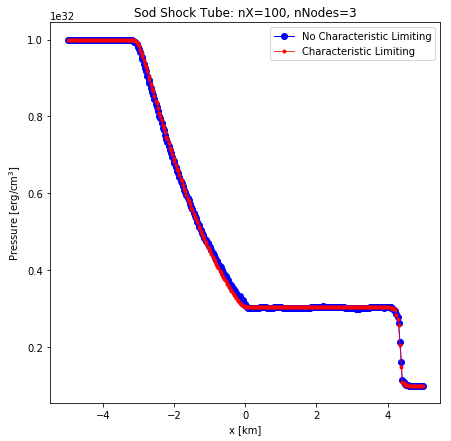

In [12]:
fig, ax1 = plt.subplots(figsize=(7,7))

ax2 = plt.plot(x1_cw,data_cw['uAF_P'], linestyle='-', marker='o',linewidth=1.0, label="No Characteristic Limiting", color = "blue")
ax1 = plt.plot(x1,data['uAF_P'], linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting", color="red", alpha=1.0)

plt.legend()
plt.title("Sod Shock Tube: nX=100, nNodes=3")
plt.xlabel("x [km]")
plt.ylabel(r"Pressure [erg/cm$^3$]")

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

Plot! Velocity

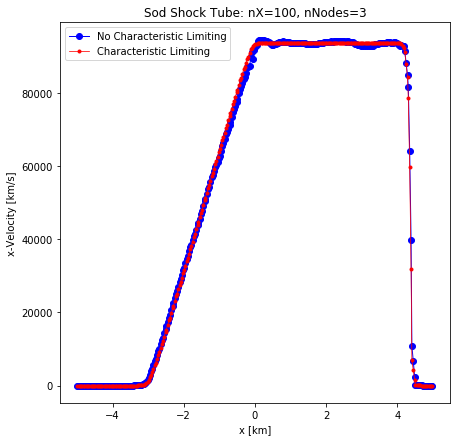

In [13]:
fig, ax1 = plt.subplots(figsize=(7,7))

ax2 = plt.plot(x1_cw,data_cw['uPF_V1'], linestyle='-', marker='o',linewidth=1.0, label="No Characteristic Limiting", color = "blue")
ax1 = plt.plot(x1,data['uPF_V1'], linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting", color="red", alpha=1.0)

plt.legend()
plt.title("Sod Shock Tube: nX=100, nNodes=3")
plt.xlabel("x [km]")
plt.ylabel(r"x-Velocity [km/s]")

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

Plot! Electron Fraction

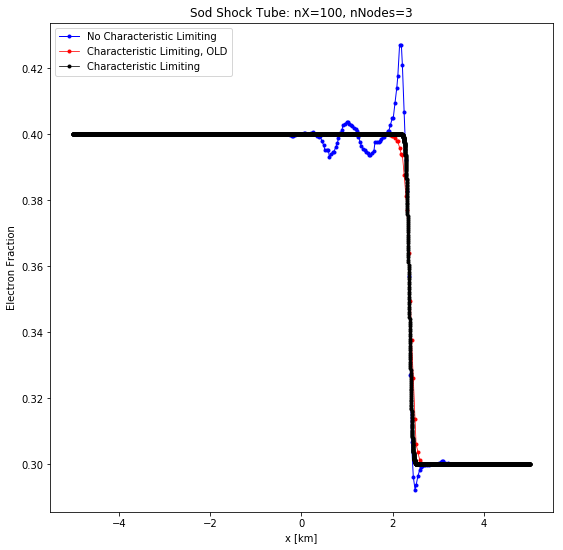

In [22]:
fig, ax1 = plt.subplots(1,figsize=(9,9))

ye_char = []
ye_char[:] = data['uCF_Ne'][:]* mb / data['uCF_D'][:]

ye_cw = []
ye_cw[:] = data_cw['uCF_Ne'][:]* mb / data_cw['uCF_D'][:]

ye_test = []
ye_test[:] = data_test['uCF_Ne'][:]* mb / data_test['uCF_D'][:]

ax1.plot(x1,ye_cw, linestyle='-', marker='.',linewidth=1.0, label="No Characteristic Limiting", color = "blue")
ax1.plot(x1,ye_char, linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting, OLD", color="red", alpha=1.0)
ax1.plot(x1_test,ye_test, linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting", color="black", alpha=1.0)



ax1.legend()
plt.title("Sod Shock Tube: nX=100, nNodes=3")
ax1.set(xlabel='x [km]',ylabel="Electron Fraction")

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

Plot! Electron Density

In [34]:
fig, ax1 = plt.subplots(1,figsize=(7,7))

ax1.plot(x1_cw,data_cw['uCF_Ne'], linestyle='-', marker='o',linewidth=1.0, label="No Characteristic Limiting", color = "blue")
ax1.plot(x1,data['uCF_Ne'], linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting", color="red", alpha=1.0)
ax1.plot(x1,data['uCF_D']/mb, linestyle='-', marker='.',linewidth=0.75, label="Characteristic Limiting (D)", alpha=1.0)

ax1.legend()
plt.title("Sod Shock Tube: nX=100, nNodes=3")
ax1.set(xlabel='x [km]',ylabel="Electron Density [Units]")

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

FigureCanvasNbAgg()

Testing the bugs

In [10]:
fig, cax = plt.subplots(1, sharex=True,figsize=(7,7))

cax.plot(x1_an,data_an['uCF_D'], linestyle='-', marker='.',markersize=2,linewidth=3.0, label="Reference", color = "blue")
cax.plot(x1,data['uCF_D'], linestyle='-',marker='.',markersize=2,linewidth=0.75, label="Characteristic Limiting, OLD", color="red", alpha=1.0)
cax.plot(x1_test,data_test['uCF_D'], linestyle='-',marker='.',markersize=2,linewidth=0.75, label="Characteristic Limiting, NEW", color="black", alpha=1.0)


#cax.plot(x1_cw,data_cw['uCF_D'], linestyle='-', marker='.',markersize=2,linewidth=0.75, label="Componentwise Limiting", color="green", alpha=1.0)



cax.legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax.set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

FigureCanvasNbAgg()

In [32]:
np.shape(x1_test)
np.shape(x1)

(300,)